# Pyber Challenge



### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Read the City and Ride Data
ride_data_df = pd.read_csv("ride_data.csv")
city_data_df = pd.read_csv("city_data.csv")

### Merge the DataFrames

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [15]:
#  1. Get the total rides for each city type
rides_by_cityType = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_cityType

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [16]:
# 2. Get the total drivers for each city type
total_drivers_by_cityType = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_cityType

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [17]:
#  3. Get the total amount of fares for each city type
fares_by_cityType = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_cityType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
#  4. Get the average fare per ride for each city type. 
ave_fare_by_cityType = pyber_data_df.groupby(["type"]).mean()["fare"]
ave_fare_by_cityType

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [19]:
# 5. Get the average fare per driver for each city type. 
ave_driver_fare_by_cityType = pyber_data_df.groupby(["type"]).sum()["fare"] / total_drivers_by_cityType
ave_driver_fare_by_cityType

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [20]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
            {'Total Rides':rides_by_cityType,
             'Total Drivers':total_drivers_by_cityType,
             'Total Fares':fares_by_cityType,
             'Average Fare per Ride':ave_fare_by_cityType,
             'Average Fare per Driver':ave_driver_fare_by_cityType}
            )
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [21]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [22]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [26]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [27]:
pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"])
pyber_data_df["date"]

0      2019-01-14 10:14:00
1      2019-03-04 18:24:00
2      2019-02-24 04:29:00
3      2019-02-10 23:22:00
4      2019-03-06 04:28:00
               ...        
2370   2019-04-29 17:04:00
2371   2019-01-30 00:05:00
2372   2019-02-10 21:03:00
2373   2019-05-07 19:22:00
2374   2019-04-25 10:20:00
Name: date, Length: 2375, dtype: datetime64[ns]

In [29]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_city_date_df = pyber_data_df.groupby(["type", "date"]).sum().fare.to_frame()
fares_by_city_date_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33

In [30]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_city_date_df = fares_by_city_date_df.reset_index()
fares_by_city_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33


In [31]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_city_date_df = fares_by_city_date_df.pivot(index="date",columns="type", values="fare")
fares_by_city_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# the date formate is 1/1/2019 : 4/29/2019
date_range_df = fares_by_city_date_df.loc["2019-01-01" : "2019-04-29"]
date_range_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [37]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_range_df.index = pd.to_datetime(date_range_df.index)
date_range_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fare_week_df = date_range_df.resample("w").sum()
sum_fare_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'Total Fare by City Type')

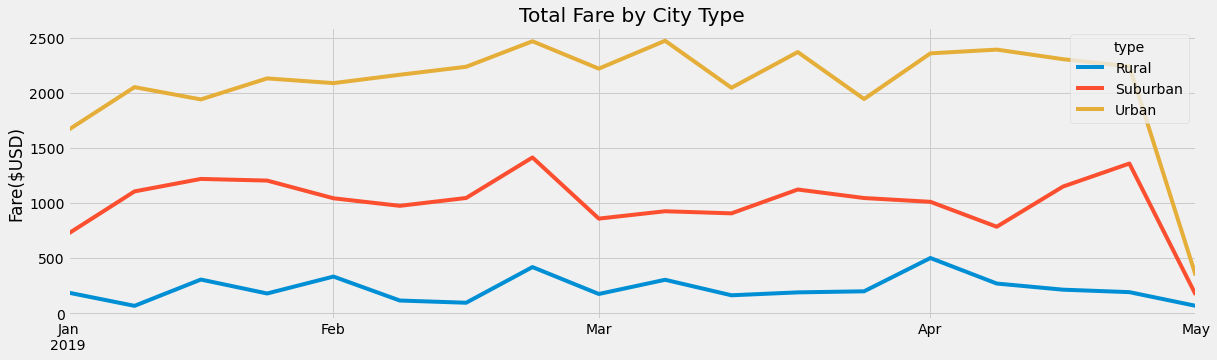

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

sum_fare_week_df.plot(figsize=(18,5),)
plt.xlabel("")
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")
plt.savefig('analysis/Pyber_fare_summary.png')